In [1]:
import pandas as pd
vacancy = pd.read_csv('vacancy.csv.zip')

FileNotFoundError: [Errno 2] No such file or directory: 'vacancy.csv.zip'

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
# Посмотреть первые строчки
vacancy.head(3)

,id,created_at,updated_at,vacid,vactitle,vacdescription,vacdate,vacstatus,vaclink,vachtml
0,383479,2021-03-14 09:39:21.854462,2021-03-14 09:39:21.854584,1474941,Senior java-разработчик (в команду Онбординга),"Работа у нас — это:команда профессионалов, го...",2021-03-15,new,https://my.sbertalents.ru/#/job-requisition/14...,"{""title"": ""Senior java-\u0440\u0430\u0437\u044..."
1,383480,2021-03-14 09:39:21.854462,2021-03-14 09:39:21.854584,1476154,Дизайнер мобильных приложений,Мы ищем дизайнера в нашу дружную команду Сбер...,2021-03-15,new,https://my.sbertalents.ru/#/job-requisition/14...,"{""title"": ""\u0414\u0438\u0437\u0430\u0439\u043..."
2,383481,2021-03-14 09:39:21.854462,2021-03-14 09:39:21.854584,1479834,Старший специалист отдела мониторинга залогово...,Условия: ● официальное трудоустройство;● 5-т...,2021-03-15,new,https://my.sbertalents.ru/#/job-requisition/14...,"{""title"": ""\u0421\u0442\u0430\u0440\u0448\u043..."


In [7]:
# убрать лишнее
vacancy = vacancy.drop(['vachtml','created_at','updated_at'], axis=1)

In [8]:
# посчитать по датам количество вакансий
vacancy.groupby('vacdate')['vacid'].count()

vacdate
2020-10-15      3
2020-10-16      2
2020-10-19      2
2020-10-20      2
2020-10-21      1
             ... 
2021-03-13      7
2021-03-14     10
2021-03-15    188
2021-03-16    214
2021-03-17    186
Name: vacid, Length: 115, dtype: int64

In [11]:
# перевести даты в формат datetime
vacancy.vacdate = pd.to_datetime(vacancy.vacdate)

dtype('O')

In [13]:
# перевести даты в индекс и построить график
vacancy = vacancy.set_index('vacdate')

In [26]:
# найти профессии с самым большим количеством вакансий и построить по ним график
vacs = vacancy.groupby('vactitle')['vacid'].count().reset_index()


In [36]:
# vacancy.groupby('vactitle')['vacid'].count().sort_values()

In [20]:
# vacs = vacs.sort_values(by='vacid',ascending=False)

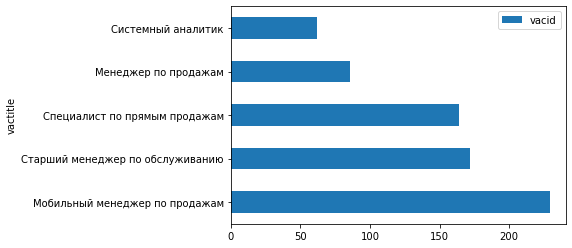

In [50]:
vacs.nlargest(5, 'vacid').set_index('vactitle').plot(kind='barh');

In [80]:
# Найти вакансии аналитика

s = 'аналитик'.lower()
python_s = 'python'

In [84]:
t1 = vacancy.vactitle.str.lower().str.contains(s)
t2 = vacancy.vacdescription.str.lower().str.contains(python_s)
vacancy[t1 & t2].shape

(57, 6)

In [3]:
# посчитать количество вакансий аналитика

In [5]:
# найти вакансии аналитика который использует python

In [91]:
# отфильтровать вакансии по дате
vacancy[t1 | t2].reset_index().sort_values(by='vacdate', ascending=False).head()

,vacdate,id,vacid,vactitle,vacdescription,vacstatus,vaclink
56,2021-03-16,383395,1519655,Старший аналитик по созданию системы принятия ...,Дивизион разрабатывает Интеллектуальную систем...,new,https://my.sbertalents.ru/#/job-requisition/15...
54,2021-03-16,383282,1498731,Ведущий аналитик-исследователь,Условия:Конкурентоспособный уровень дохода (ок...,new,https://my.sbertalents.ru/#/job-requisition/14...
53,2021-03-16,383222,1571234,Системный аналитик (ММБ),Условия:Хорошо мотивирующий оклад + система пр...,new,https://my.sbertalents.ru/#/job-requisition/15...
1,2021-03-15,383600,1564167,Аналитик SQL (кампании продаж),Условия:- работа в крупнейшем банке России;- т...,new,https://my.sbertalents.ru/#/job-requisition/15...
55,2021-03-15,383377,1435644,Системный аналитик,"Сбер — больше чем банк, это вселенная полезных...",new,https://my.sbertalents.ru/#/job-requisition/14...


In [ ]:
vacanc